In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

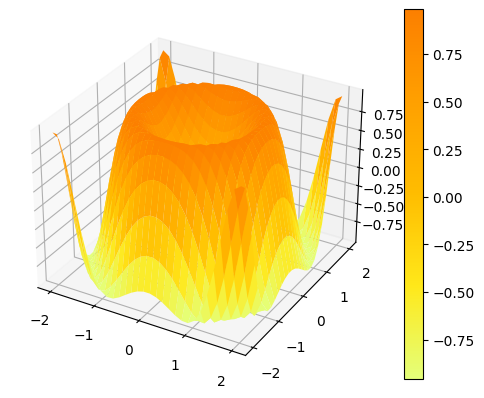

In [ ]:
# 3D Surface Plot

import mpl_toolkits.mplot3d

x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
y = x.copy().T
z = np.sin(x ** 2 + y ** 2)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, z, cmap='Wistia')
fig.colorbar(surf)
plt.show()

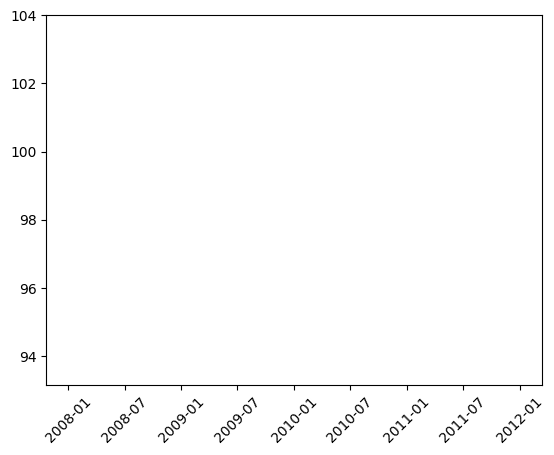

In [ ]:
# Animation of Stock Market Prices

from matplotlib.animation import FuncAnimation

dates = pd.date_range(start='2010-01-01', periods=3650, freq='D')
prices = np.random.normal(loc=100, scale=15, size=(3650,))

fig, ax = plt.subplots()
line, = ax.plot(dates[0], prices[0])
plt.xticks(rotation=45)

def update(num, dates, prices, line):
  line.set_data(dates[:num], prices[:num])
  return line,

anim = FuncAnimation(fig, update, len(dates), fargs=[dates, prices, line], interval=25, blit=True)

plt.show()

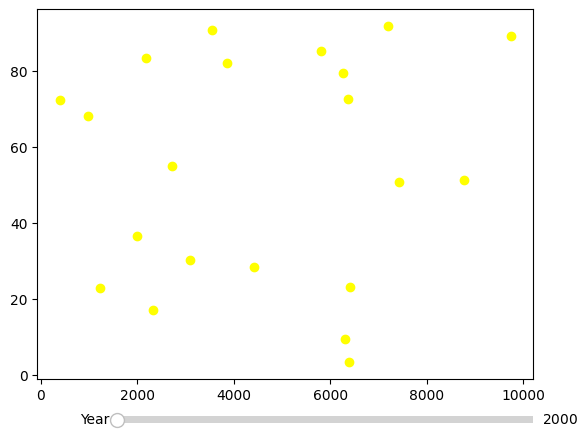

In [ ]:
# Dynamic Scatter Plot of World Development Indicators

from matplotlib.widgets import Slider

years = np.arange(2000, 2021)
gdp = np.random.rand(21) * 10000
life_expectancy = np.random.rand(21) * 100

fig, ax = plt.subplots()
scatter = ax.scatter(gdp, life_expectancy, color='#f5c70f')

axyear = plt.axes([0.25, 0.01, 0.65, 0.03], facecolor='lightgoldenrodyellow')
syear = Slider(axyear, 'Year', 2000, 2020, valinit=2000, valstep=1)

def update(val):
  year = int(syear.val)
  scatter.set_offsets(np.column_stack(gdp[year-2000], life_expectancy[year-2000]))
  fig.canvas.draw_idle()

syear.on_changed(update)
plt.show()

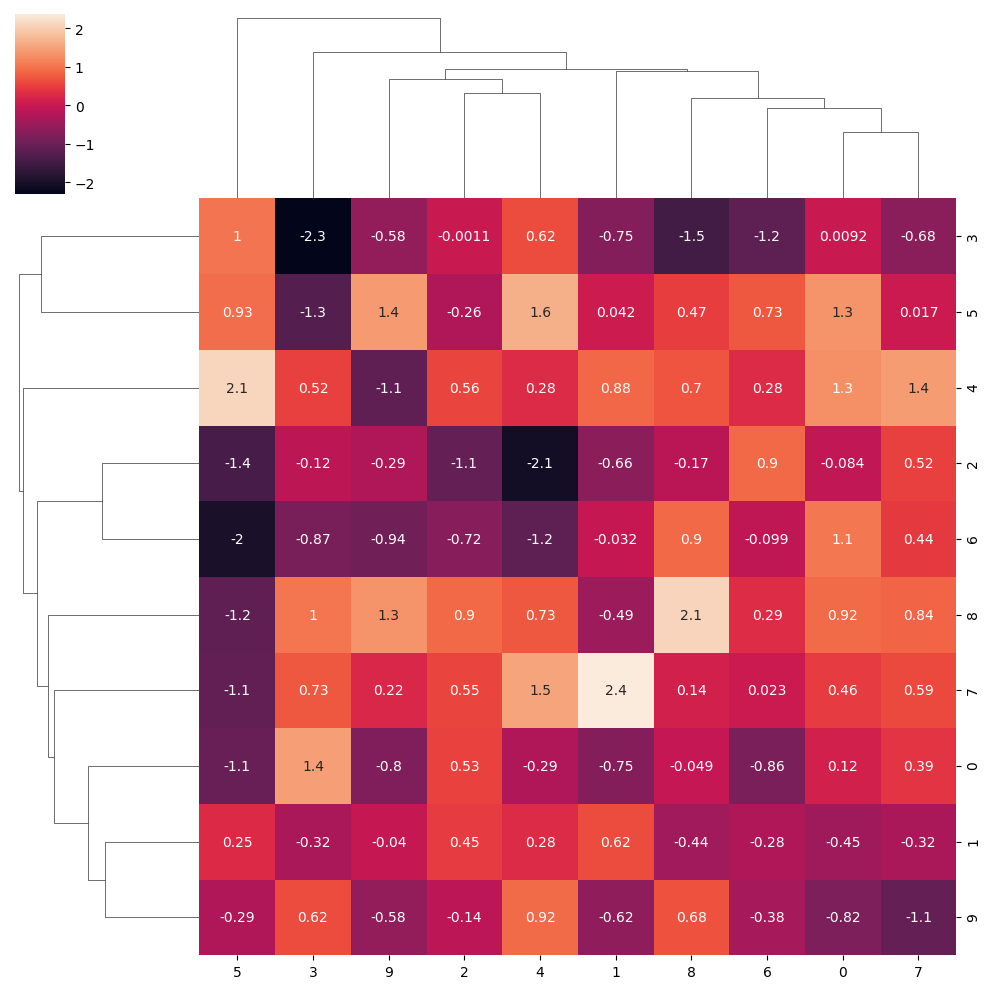

In [ ]:
# Complex Heatmap of Gene Expression Data

data = np.random.randn(10, 10)
sns.clustermap(data, figsize=(10, 10), annot=True)
plt.show()

<ipython-input-98-a96d5133cc70>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(ds['dt'][::steps], rotation = 45)
<ipython-input-98-a96d5133cc70>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(ds['dt'][::steps], rotation = 45)
<ipython-input-98-a96d5133cc70>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(ds['dt'][::steps], rotation = 45)


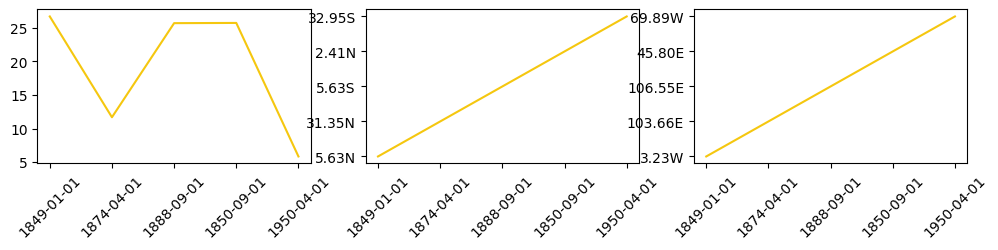

In [ ]:
# Weather Pattern Visualization

ds = pd.read_csv('/content/drive/MyDrive/Datasets/GlobalLandTemperaturesByMajorCity.csv')
steps = 50000

# Take specific months

fig, axs = plt.subplots(1, 3, figsize=(12, 2))
axs[0].plot(ds['dt'][::steps], ds['AverageTemperature'][::steps], color='#f5c70f')
axs[0].set_xticklabels(ds['dt'][::steps], rotation = 45)
axs[1].plot(ds['dt'][::steps], ds['Latitude'][::steps], color='#f5c70f')
axs[1].set_xticklabels(ds['dt'][::steps], rotation = 45)
axs[2].plot(ds['dt'][::steps], ds['Longitude'][::steps], color='#f5c70f')
axs[2].set_xticklabels(ds['dt'][::steps], rotation = 45)

plt.show()

In [ ]:
# Interactive Map of Earthquake Incidences

import plotly.express as px
import folium

data = pd.DataFrame({
    'Latitude': [34.0522, 37.7749, 40.7128],
    'Longitude': [-118.2437, -122.4194, -74.0060],
    'Magnitude':  [4.5, 5.2, 3.9]
})

map = folium.Map(location=[37.7749, -122.4194], zoom_start=5)

for i, earthquake in data.iterrows():
  folium.CircleMarker(
      location=[earthquake['Latitude'], earthquake['Longitude']],
      radius=data['Magnitude'][i] * 10,
      popup=f"Magnitude: {earthquake['Magnitude']}",
      color='red',
      fill=True,
      fill_color='red'
  ).add_to(map)

map.save('earthquakes1.html')

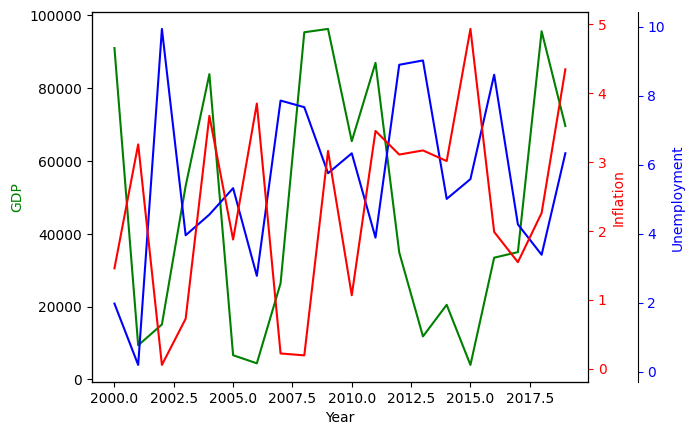

In [ ]:
# Multi-Axis Visualization of Economic Data

years = np.arange(2000, 2020)
gdp = np.random.rand(20) * 100000
unemployment = np.random.rand(20) * 10
inflation = np.random.rand(20) * 5

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax2.spines.right.set_position(('axes', 1.1))

ax1.plot(years, gdp, 'g-')
ax2.plot(years, unemployment, 'b-')
ax3.plot(years, inflation, 'r-')

ax2.tick_params(axis='y', colors='blue')
ax3.tick_params(axis='y', colors='red')

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP', color='green')
ax2.set_ylabel('Unemployment', color='blue')
ax3.set_ylabel('Inflation', color='red')

plt.show()

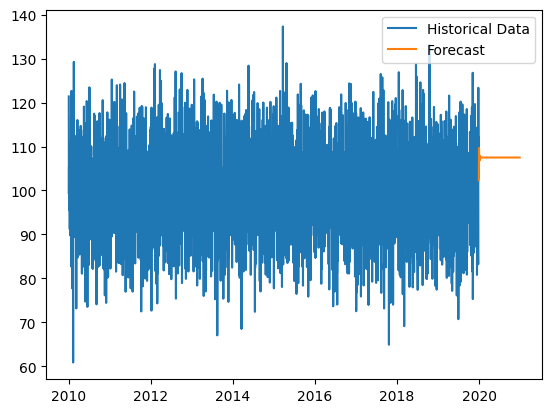

In [ ]:
# Time Series Forecasting

from statsmodels.tsa.arima.model import ARIMA

dates = pd.date_range(start='2010-01-01', periods=3650, freq='D')
prices = pd.Series(np.random.normal(100, 10, 3650), index=dates)

model = ARIMA(prices, order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=365)

fig, ax = plt.subplots()
ax.plot(prices.index, prices, label='Historical Data')
ax.plot(pd.date_range(start=dates[-1], periods=366, freq='D')[1:], forecast, label='Forecast')
plt.legend()
plt.show()

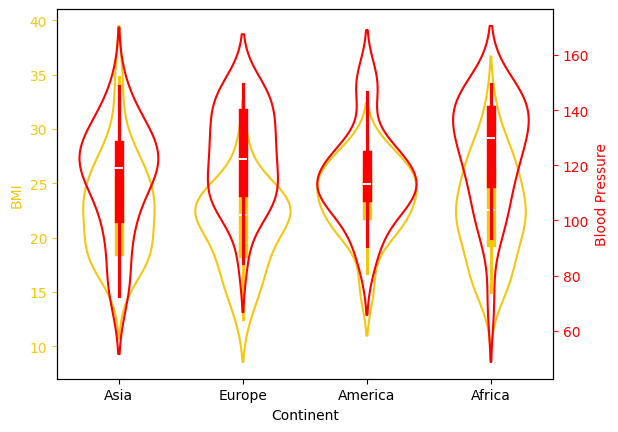

In [ ]:
# Violin Plot of Global Health Data

ds = pd.DataFrame({
    'BMI': np.random.normal(22, 4, 100),
    'Blood Pressure': np.random.normal(120, 20, 100),
    'Continent': ['Asia'] * 25 + ['Europe'] * 25 + ['America'] * 25 + ['Africa'] * 25
})

ax1 = sns.violinplot(x='Continent', y='BMI', data=ds, color='#f5c70f', fill=False)
ax1.tick_params(axis='y', colors='#f5c70f')
ax1.set_ylabel('BMI', color='#f5c70f')

ax2 = ax1.twinx()
ax2 = sns.violinplot(x='Continent', y='Blood Pressure', data=ds, color='red', fill=False)
ax2.tick_params(axis='y', colors='red')
ax2.set_ylabel('Blood Pressure', color='red')

plt.show()

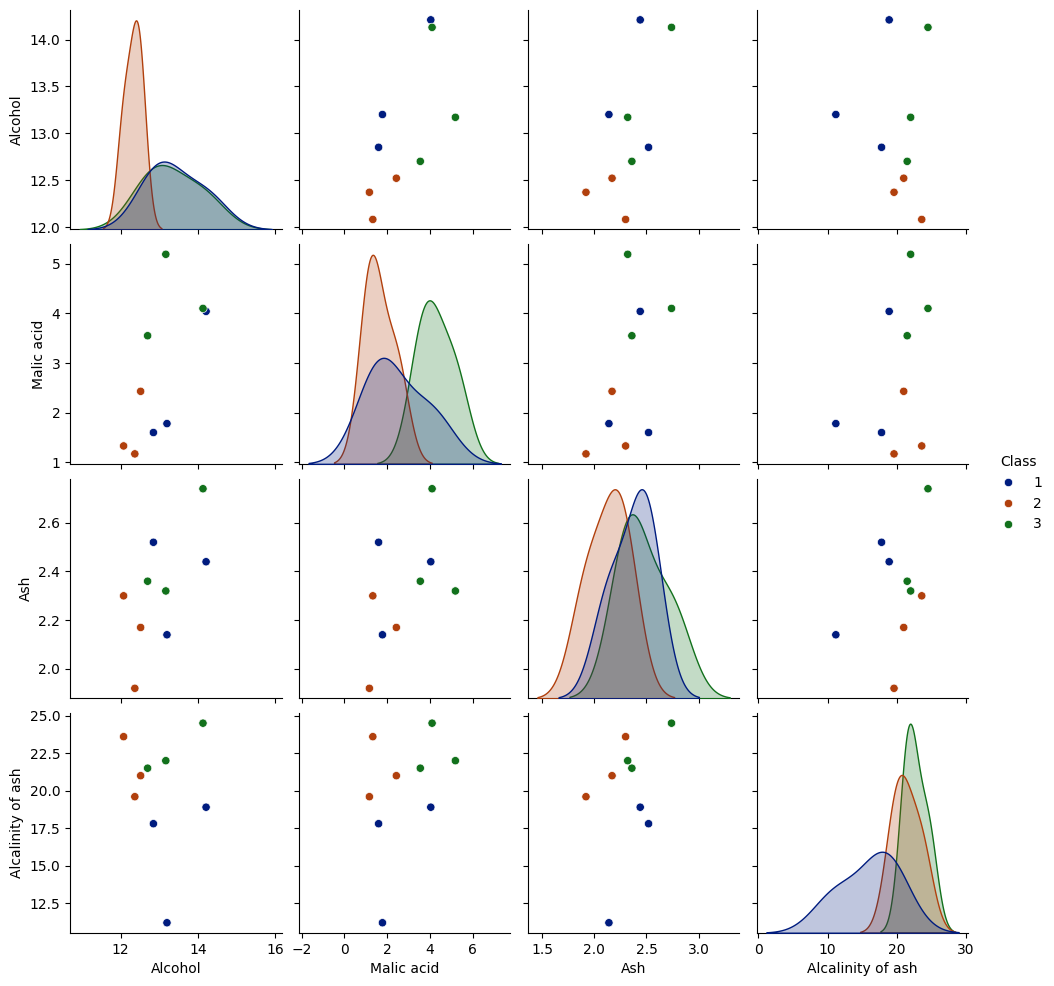

In [ ]:
# Pair Plot for Multidimensional Analysis

# https://archive.ics.uci.edu/dataset/109/wine

header = ['Class',
 'Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenol',
 'Proanthocyanis',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

ds = pd.read_csv('/content/drive/MyDrive/Datasets/wine.data')
ds = ds.set_axis(header, axis=1)

sns.pairplot(ds.iloc[::22, :5], hue='Class', palette='dark')
plt.show()

<ipython-input-32-7e9cd3b63511>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ds.columns[1:], rotation=45)


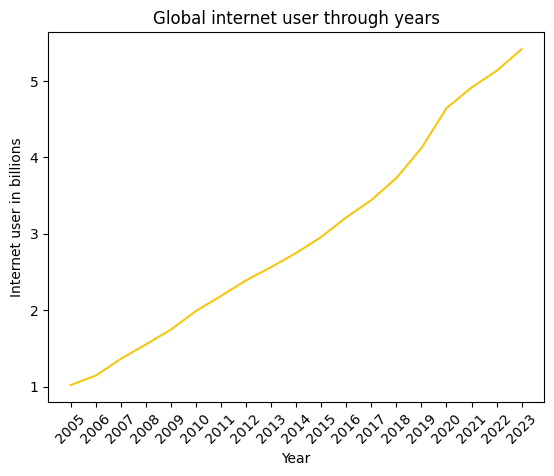

In [ ]:
# Logarithmic Scaling Plot

# https://www.itu.int/en/ITU-D/Statistics/Pages/stat/default.aspx

ds = pd.read_excel('/content/drive/MyDrive/Datasets/01- InternetUse1.xlsx')

fig, ax = plt.subplots()
ax.plot(ds.columns[1:], ds.values[0][1:], color='#f5c70f')
ax.set_xticklabels(ds.columns[1:], rotation=45)
ax.set_xlabel('Year')
ax.set_ylabel('Internet user in billions')
ax.set_title('Global internet user through years')
plt.show()

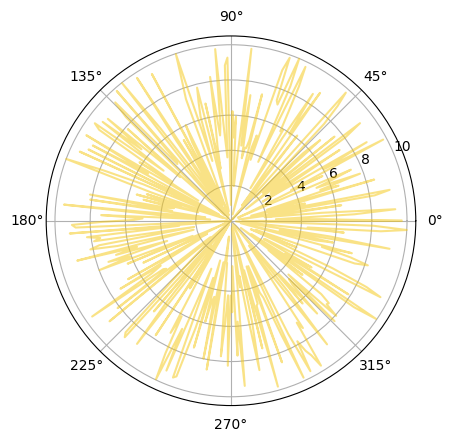

In [ ]:
# Complex Polar Plot

angles = np.linspace(0, 2 * np.pi, 360)
speeds = np.random.rand(360) * 10

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, speeds, color='#f5c70f', alpha=0.5)
plt.show()

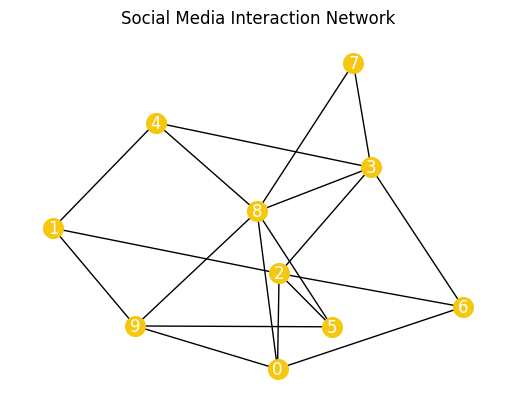

In [ ]:
# Network Graph of Social Media Interactions

import networkx as nx

G = nx.gnp_random_graph(10, 0.5)
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=200, node_color='#f5c70f')
nx.draw_networkx_edges(G, pos, width=1)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif', font_color='white')
plt.title('Social Media Interaction Network')
plt.axis('off')
plt.show()

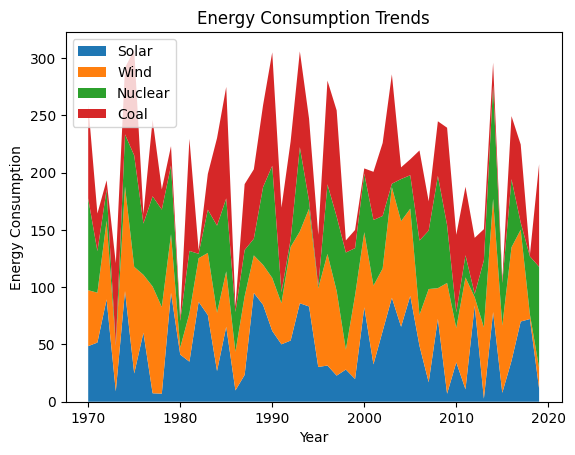

In [ ]:
# Stacked Area Plot for Energy Consumption

years = np.arange(1970, 2020)
solar = np.random.rand(50) * 100
wind = np.random.rand(50) * 100
nuclear = np.random.rand(50) * 100
coal = np.random.rand(50) * 100

fig, ax = plt.subplots()
ax.stackplot(years, coal, wind, nuclear, solar, labels=['Solar', 'Wind', 'Nuclear', 'Coal'])
ax.legend(loc='upper left')
ax.set_title('Energy Consumption Trends')
ax.set_xlabel('Year')
ax.set_ylabel('Energy Consumption')
plt.show()

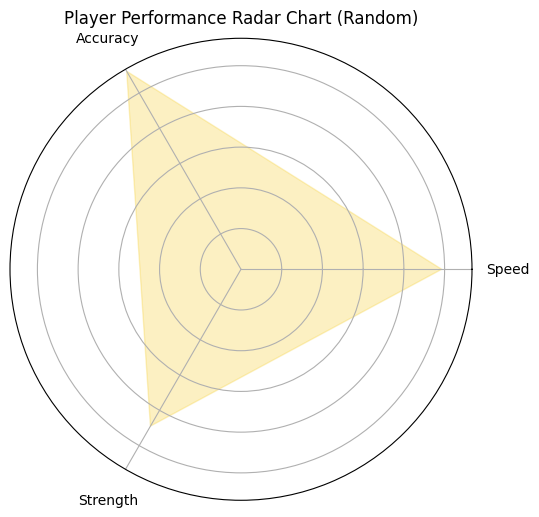

In [ ]:
# Radar Chart for Player Performance

labels = np.array(['Speed', 'Accuracy', 'Strength']) # Perhaps add more features?
stats = np.random.normal(loc=100, scale=20, size=(3,))
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

stats = np.concatenate((stats, [stats[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, stats, color='#f5c70f', alpha=0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.tick_params(axis='x', pad=15)
ax.set_title('Player Performance Radar Chart (Random)')

plt.show()